In [2]:
import pandas as pd
import seaborn as sb

datos = pd.read_csv("pesov2.csv")


In [3]:
datos.describe()


,Peso,Altura
count,10000.000000,10000.000000
mean,72.733900,168.073300
std,14.572204,9.775269
min,29.000000,137.000000
25%,61.000000,161.000000
50%,73.000000,168.000000
75%,84.000000,175.000000
max,122.000000,200.000000


In [4]:
datos.head()

,Sexo,Peso,Altura
0,Hombre,109,187
1,Hombre,73,174
2,Hombre,96,188
3,Hombre,99,182
4,Hombre,93,177


array([[<Axes: title={'center': 'Peso'}>,
        <Axes: title={'center': 'Altura'}>]], dtype=object)

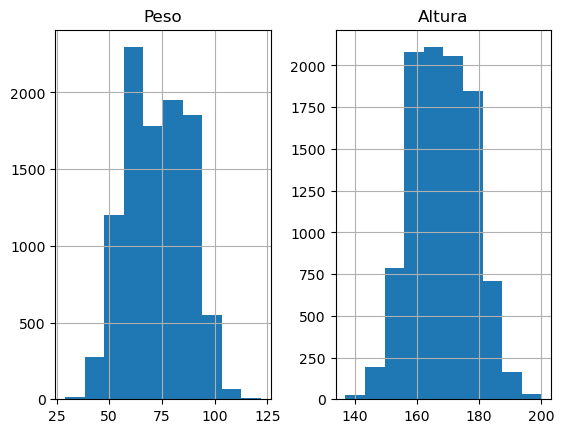

In [5]:
datos.hist()

<Axes: xlabel='Altura', ylabel='Peso'>

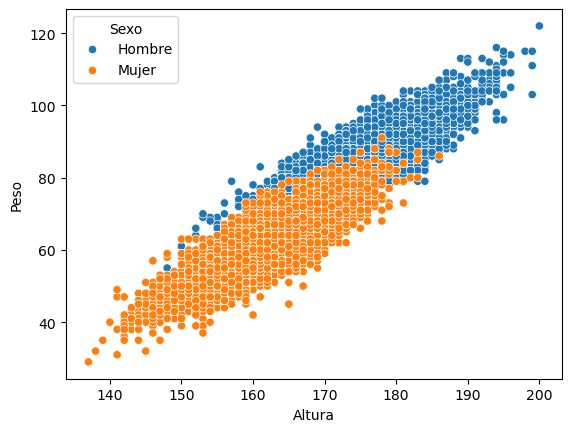

In [6]:
import seaborn as sb


sb.scatterplot(x="Altura",y="Peso",data=datos,hue="Sexo")

In [7]:
datos["Sexo"].value_counts()

Sexo
Hombre    5000
Mujer     5000
Name: count, dtype: int64

In [8]:
datos['Sexo_num'] = pd.get_dummies(datos['Sexo'], drop_first=True, dtype=int)


In [9]:
datos= datos[['Peso', 'Altura', 'Sexo_num']]

In [10]:
datos.corr()

,Peso,Altura,Sexo_num
Peso,1.000000,0.924102,-0.796700
Altura,0.924102,1.000000,-0.690522
Sexo_num,-0.796700,-0.690522,1.000000


<Axes: >

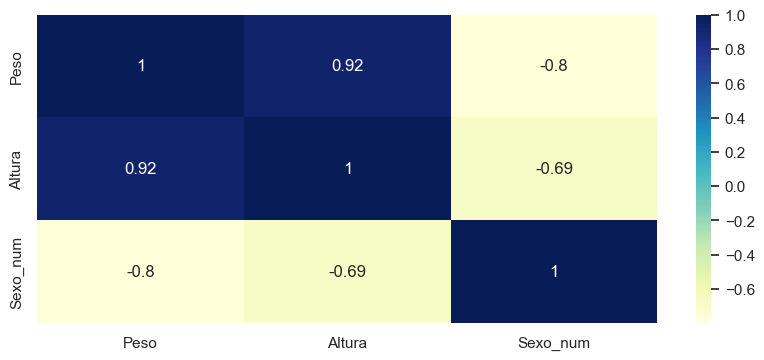

In [11]:
sb.set_theme(rc={'figure.figsize':(10,4)})
sb.heatmap(datos.corr(),annot=True,cmap="YlGnBu")

In [12]:
datos.corr()["Peso"].sort_values(ascending=False)

Peso        1.000000
Altura      0.924102
Sexo_num   -0.796700
Name: Peso, dtype: float64

<Axes: xlabel='Altura', ylabel='Peso'>

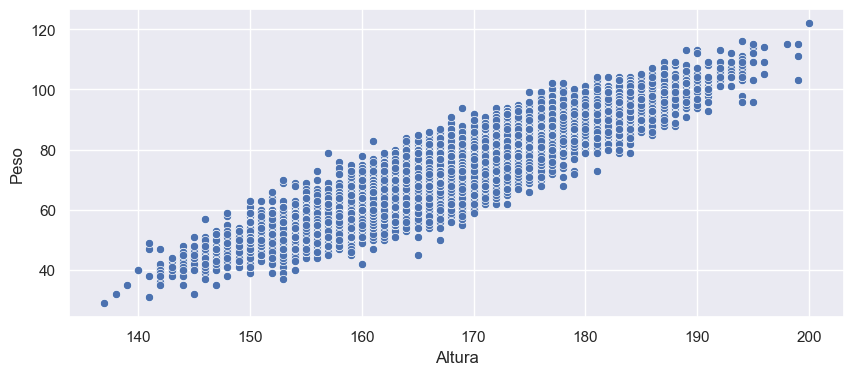

In [13]:
sb.scatterplot(x=datos["Altura"],y=datos["Peso"])

In [14]:
X = datos[['Altura', 'Sexo_num']].values
y = datos['Peso'].values

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

In [16]:
modelo.fit(X_ent, y_ent)


LinearRegression()

In [17]:
altura = 167
prediccion=modelo.predict([[altura,1]])
[degg] = prediccion
print(f'para {altura} cm de altura, lo recomendable es pesar {str(round(degg, 2))} Kg')

para 167 cm de altura, lo recomendable es pesar 67.16 Kg


In [18]:
from sklearn.metrics import r2_score

# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_pru)

# Calcular R²
r2 = r2_score(y_pru, y_pred)
print(f'R² Score: {r2}')


R² Score: 0.9025024355225177


In [19]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pru, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 3.6197323726745316


In [20]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pru, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


Mean Squared Error (MSE): 21.022108083047748


In [21]:
import numpy as np

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 4.584987250042005


In [22]:
correlation = np.corrcoef(y_pru, y_pred)[0, 1]
print(f'Pearson Correlation: {correlation}')


Pearson Correlation: 0.9500326136716984
